In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import *
import re

In [2]:
element = pd.read_csv('elements.csv')
element.head()

,Unnamed: 0,id,web_name,element_type,team,now_cost
0,0,1,Mustafi,2,1,52
1,1,2,Bellerín,2,1,54
2,2,3,Kolasinac,2,1,53
3,3,4,Maitland-Niles,2,1,47
4,4,5,Sokratis,2,1,50


In [3]:
path = 'past/'
past = pd.DataFrame()
for i in element.index:
    ID = element.loc[i,'id']
    cost = element.loc[i,'now_cost']
#     t={}
    t=pd.read_csv(path+'{}.csv'.format(ID))
    t['ID'] = ID
    t['cost'] = cost
    past = past.append(t,ignore_index=True)
past

/home/ali/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ID,Unnamed: 0,assists,bonus,bps,clean_sheets,cost,creativity,element_code,end_cost,...,own_goals,penalties_missed,penalties_saved,red_cards,saves,season_name,start_cost,threat,total_points,yellow_cards
0,1,0,2.0,8.0,513.0,8.0,52,159.7,69140.0,58.0,...,0.0,0.0,0.0,0.0,0.0,2016/17,60.0,364.0,90.0,11.0
1,1,1,1.0,13.0,610.0,10.0,52,129.9,69140.0,54.0,...,0.0,0.0,0.0,0.0,0.0,2017/18,55.0,202.0,109.0,6.0
2,1,2,0.0,5.0,475.0,6.0,52,106.0,69140.0,54.0,...,0.0,0.0,0.0,0.0,0.0,2018/19,55.0,252.0,80.0,9.0
3,2,0,0.0,0.0,0.0,0.0,54,0.0,98745.0,45.0,...,0.0,0.0,0.0,0.0,0.0,2013/14,45.0,0.0,0.0,0.0
4,2,1,1.0,5.0,372.0,7.0,54,0.0,98745.0,48.0,...,0.0,0.0,0.0,0.0,0.0,2014/15,45.0,0.0,77.0,5.0
5,2,2,6.0,18.0,871.0,18.0,54,0.0,98745.0,65.0,...,0.0,0.0,0.0,0.0,0.0,2015/16,55.0,0.0,172.0,3.0
6,2,3,5.0,12.0,569.0,10.0,54,508.3,98745.0,65.0,...,0.0,0.0,0.0,0.0,0.0,2016/17,65.0,395.0,119.0,4.0
7,2,4,4.0,11.0,656.0,12.0,54,561.0,98745.0,59.0,...,0.0,0.0,0.0,0.0,0.0,2017/18,60.0,484.0,132.0,5.0
8,2,5,5.0,5.0,304.0,4.0,54,197.8,98745.0,53.0,...,1.0,0.0,0.0,0.0,0.0,2018/19,55.0,280.0,60.0,3.0
9,3,0,4.0,6.0,510.0,10.0,53,334.9,111457.0,58.0,...,0.0,0.0,0.0,0.0,0.0,2017/18,60.0,404.0,108.0,3.0


In [4]:
print(past.columns)
past = past.drop(columns=['Unnamed: 0'])

Index(['ID', 'Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'cost',
       'creativity', 'element_code', 'end_cost', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves',
       'season_name', 'start_cost', 'threat', 'total_points', 'yellow_cards'],
      dtype='object')


In [5]:
points = past[['ID','season_name','total_points','cost']]
points.head()

,ID,season_name,total_points,cost
0,1,2016/17,90.0,52
1,1,2017/18,109.0,52
2,1,2018/19,80.0,52
3,2,2013/14,0.0,54
4,2,2014/15,77.0,54


In [6]:
forecast = points.groupby('ID')['total_points'].mean().to_frame()
costs = points.groupby('ID')['cost'].mean().to_frame()
forecast.head()

,total_points
ID,
1,93.000000
2,93.333333
3,94.500000
4,15.250000
5,64.000000


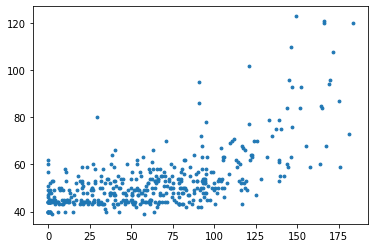

In [7]:
plt.scatter(forecast,costs,s=8)

In [8]:
# element.loc[element.id.isin(forecast.nlargest(20,'total_points'))]
forecast.nlargest(20,'total_points').index

Int64Index([210, 409, 189, 343, 338, 166, 187, 240, 214, 192, 344, 232, 212,
            141, 390,  12, 217, 191, 216, 219],
           dtype='int64', name='ID')

In [9]:
element.loc[element.id.isin(forecast.nlargest(50,'total_points').index)].head()

,Unnamed: 0,id,web_name,element_type,team,now_cost
6,6,7,Koscielny,2,1,50
10,10,11,Aubameyang,4,1,110
11,11,12,Lacazette,4,1,93
14,14,15,Özil,3,1,72
67,67,68,King,4,3,63


In [10]:
forecast['id'] = forecast.index
forecast.head()

,total_points,id
ID,,
1,93.000000,1
2,93.333333,2
3,94.500000,3
4,15.250000,4
5,64.000000,5


In [15]:
# Create the decision variables.. all the players (so 371 for this initial try)
def create_dec_var(df):
    decision_variables = []
    
    for rownum, row in df.iterrows():
        variable = str('x' + str(rownum))
        variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer')
        decision_variables.append(variable)
                                  
    return decision_variables

# This is what we want to maximize (objective function)
def total_points(df,lst,prob):
    total_points = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                formula = row['total_points']*player
                total_points += formula

    prob += total_points
    
    return prob

# Add constraint for cash
def cash(df,lst,prob,avail_cash):
    total_paid = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                formula = row['now_cost']*player
                total_paid += formula
    prob += (total_paid <= avail_cash), "Cash"
    
    return prob

# Add constraint for number of goalkeepers
def team_gkp(df,lst,prob,avail_gk):
    total_gk = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                if row['element_type'] == 1:
                    formula = 1*player
                    total_gk += formula

    prob += (total_gk == avail_gk), "GK"
    
    return prob

# Add constraint for number of defenders
def team_def(df,lst,prob,avail_def):
    total_def = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                if row['element_type'] == 2:
                    formula = 1*player
                    total_def += formula

    prob += (total_def == avail_def), "DEF"
    
    return prob

# Add constraint for number of midfielders
def team_mid(df,lst,prob,avail_mid):
    total_mid = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                if row['element_type'] == 3:
                    formula = 1*player
                    total_mid += formula

    prob += (total_mid == avail_mid), "MID"
    
    return prob

# Add constraint for number of forwards
def team_fwd(df,lst,prob,avail_fwd):
    total_fwd = ""
    for rownum, row in df.iterrows():
        for i, player in enumerate(lst):
            if rownum == i:
                if row['element_type'] == 4:
                    formula = 1*player
                    total_fwd += formula

    prob += (total_fwd == avail_fwd), "FWD"
    
    return prob
def team_constraint(df,lst,prob,avail=3):
    team_dict= {}
    for team in set(df.team):
        team_dict[str(team)]=dict()
        team_dict[str(team)]['avail'] = 3
        team_dict[str(team)]['total'] = ""
        for rownum, row in df.iterrows():
            for i, player in enumerate(lst):
                if rownum == i:
                    if row['team'] == team:
                        formula = 1*player
                        team_dict[str(team)]['total'] += formula

    prob += (team_dict[str(team)]['total'] <= team_dict[str(team)]['avail'])
    print(len(team_dict))
    
    return prob
def find_prob(df,ca,gk,de,mi,fw):
    
    prob = pulp.LpProblem('FantasyTeam', pulp.LpMaximize)
    lst = create_dec_var(df)
    
    prob = total_points(df,lst,prob)
    prob = cash(df,lst,prob,ca)
    prob = team_gkp(df,lst,prob,gk)
    prob = team_def(df,lst,prob,de)
    prob = team_mid(df,lst,prob,mi)
    prob = team_fwd(df,lst,prob,fw)
    prob = team_constraint(df,lst,prob)
    
    return prob

def LP_optimize(df, prob):
    prob.writeLP('FantasyTeam.lp')
    
    optimization_result = prob.solve()
    assert optimization_result == pulp.LpStatusOptimal

def df_decision(df,prob):
    variable_name = []
    variable_value = []

    for v in prob.variables():
        variable_name.append(v.name)
        variable_value.append(v.varValue)

    df_vals = pd.DataFrame({'variable': variable_name, 'value': variable_value})
    for rownum, row in df_vals.iterrows():
        value = re.findall(r'(\d+)', row['variable'])
#         print(value)
        df_vals.loc[rownum, 'variable'] = int(value[0])

    df_vals = df_vals.sort_index(by='variable')

    #append results
    for rownum, row in df.iterrows():
        for results_rownum, results_row in df_vals.iterrows():
            if rownum == results_row['variable']:
                df.loc[rownum, 'Decision'] = results_row['value']

    return df


In [19]:
forecast_data = pd.merge(element,forecast,on='id')
forecast_data.reset_index()
prob = find_prob(forecast_data,10000,1,4,4,2)
LP_optimize(forecast_data,prob)
df_final = df_decision(forecast_data,prob)
print(df_final[df_final['Decision']==1.0].now_cost.sum(), df_final[df_final['Decision']==1.0].total_points.sum())
df_final[df_final['Decision']==1.0]

20


/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:144: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


889 1808.1


,Unnamed: 0,id,web_name,element_type,team,now_cost,total_points,Decision
111,142,105,Azpilicueta,2,6,59,144.666667,1.0
158,193,141,Digne,2,8,59,158.000000,1.0
180,220,159,Pereira,2,9,63,146.000000,1.0
212,254,189,Alisson,1,10,59,176.000000,1.0
215,257,192,Mané,3,10,121,166.200000,1.0
235,279,210,Agüero,4,11,120,183.500000,1.0
239,283,214,Sterling,3,11,120,166.333333,1.0
268,316,240,Sánchez,3,12,68,167.400000,1.0
363,459,343,Eriksen,3,17,87,175.000000,1.0
427,534,401,Doherty,2,20,60,144.000000,1.0
